In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import _canoeValues as cv
import math

#-------------------Inputs-------------------------------------------------------------
input_files = ["Shear_and_Moment_6 Paddlers.csv", "Shear_and_Moment_4 Paddlers.csv", "Shear_and_Moment_2 Paddlers.csv", "Shear_and_Moment_Display_Stand.csv"]
moment_files = ["Length_vs_Moment_6 Paddler.csv", "Length_vs_Moment_4 Paddler.csv", "Length_vs_Moment_2 Paddler.csv", "Length_vs_Moment_Display_Stand.csv", ]
inner_file = "Inner Hull.csv"
outer_file = "Outer Hull.csv"
compressive_strength = cv.compressive_strength # MPa
#--------------------------------------------------------------------------------------

script_dir = os.path.abspath('data')

file_path = os.path.join(script_dir, inner_file) # file path for the text file input
in_coor = pd.read_csv(file_path, header=None)

file_path = os.path.join(script_dir, outer_file) # file path for the text file input
out_coor = pd.read_csv(file_path, header=None)

# Get inner and outer hull coordinates (station points)
x_in = in_coor[0]
y_in = in_coor[1]
z_in = in_coor[2]

x_out = out_coor[0]
y_out = out_coor[1]
z_out = out_coor[2]

station_no = x_out.nunique() # number of stations
station_out = x_out.unique() # location of each station
station_in = x_in.unique()

In [6]:
# print("Max Positive Moments:\n")
# # Loop through each script
# for input_file in input_files:
#     print("\033[4m" + input_file + ":\033[0m")
#     file_path = os.path.join(script_dir, input_file)
#     info = pd.read_csv(file_path, header=None)

#     # Positive Bending Moment
#     value = float(info[1][3])
#     width = float(info[3][3])
#     depth = float(info[4][3])
#     target_station = float(info[2][3])

#     # Extract Station Information
#     Y1_in = []; Z1_in = []
#     Y2_in = []; Z2_in = []
#     Y1_out = []; Z1_out = []
#     Y2_out = []; Z2_out = []

#     for k in range(1,station_no-2,1):
#         if k == target_station:
#             X1_in = station_in[k]
#             X2_in = station_in[k+1]
#             X1_out = station_out[k]
#             X2_out = station_out[k+1]
            
#             for i in range(0,len(x_out),1):
#                 if x_out[i] == X1_out:
#                     Y1_out.append(y_out[i])
#                     Z1_out.append(z_out[i])

#                 elif x_out[i] == X2_out:
#                     Y2_out.append(y_out[i])
#                     Z2_out.append(z_out[i])
                
#                 if x_in[i] == X1_in:
#                     Y1_in.append(y_in[i])
#                     Z1_in.append(z_in[i])

#                 elif x_in[i] == X2_in:
#                     Y2_in.append(y_in[i])
#                     Z2_in.append(z_in[i])

#     # Find y_bar
#     volume = 0
#     product = 0 # y_bar*Volume
#     for i in range(0,len(Y1_out)-1,1):
#         z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
#         x = (abs(X1_in-X2_in) + abs(X1_out-X2_out))/2
#         y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
#         z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4

#         volume_i = x * y * z
#         volume += volume_i
#         product += volume_i * z_i
        
#     y_bar_top = abs(product/volume)
#     y_bar_bottom = depth - y_bar_top

#     # Find I
#     I = 0
#     for i in range(0,len(Y1_out)-1,1):
#         z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
#         y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
#         z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4
#         I_i = (1/12*y*z**3 + y*z*(abs(z_i) - y_bar_top)**2)/(10**(12)) # [m^4]
#         I = I + I_i

#     stress_top = value*(y_bar_top/1000)/I
#     stress_bottom = value*(y_bar_bottom/1000)/I

#     resistance_top = Top_strength * I / (y_bar_top/1000) * 10**6  # Nm
#     resistance_bottom = Top_strength * I / (y_bar_bottom/1000) * 10**6  # Nm

#     print('Compressive Flexural Stress = ', stress_top/10**6, ' MPa')
#     print('Tensile Flexural Stress = ', stress_bottom/10**6, ' MPa')
#     print("Applied Positive Moment: " + str(value) + ' Nm')
#     print("Resistance Top: " + str(resistance_top) + " Nm")
#     print("Resistance Bottom: " + str(resistance_bottom) + " Nm")
    
#     print("Depth: " + str(depth))
#     print("I: " + str(I))
#     print("Ybar Top: " + str(y_bar_top))
#     print("Ybar Bottom: " + str(y_bar_bottom))
#     # print("\n")
#     print(value, y_bar_top, y_bar_bottom, "\n")

Positive Moments for Every Station:

Length_vs_Moment_6 Paddler.csv:
Max Compressive Stress Top: 0.6948495890704957 MPa
Max Tensile Stress Top: 0.026115931389596784 MPa
Max Compressive Stress Bottom: -0.03119809714244924 MPa
Max Tensile Stress Bottom: -0.8300674449964272 MPa


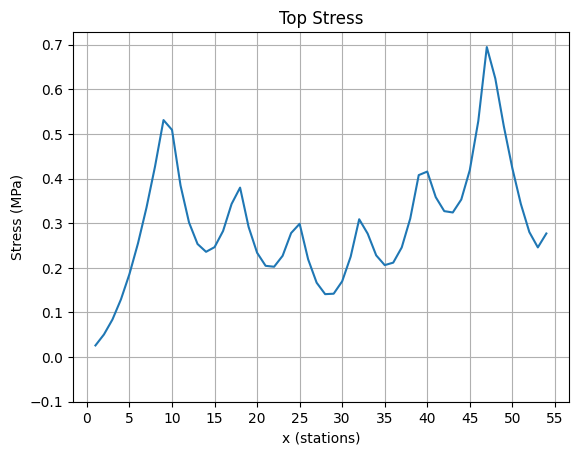

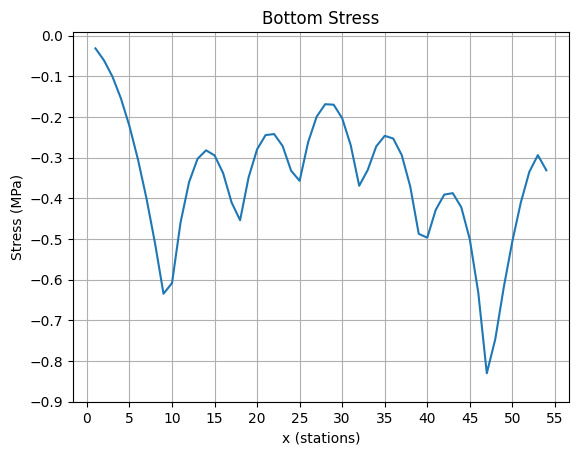

Length_vs_Moment_4 Paddler.csv:
Max Compressive Stress Top: 0.7236078755472272 MPa
Max Tensile Stress Top: 0.026352938799452132 MPa
Max Compressive Stress Bottom: -0.031481226244216336 MPa
Max Tensile Stress Bottom: -0.8644221005638268 MPa


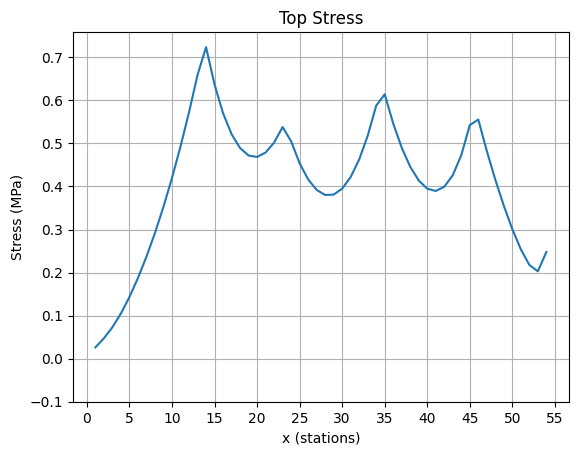

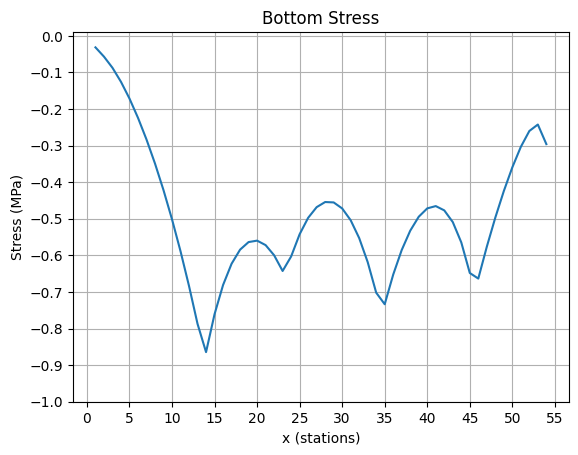

Length_vs_Moment_2 Paddler.csv:
Max Compressive Stress Top: 0.4634532914893804 MPa
Max Tensile Stress Top: -0.3025634066342547 MPa
Max Compressive Stress Bottom: 0.3614423013599515 MPa
Max Tensile Stress Bottom: -0.5536413910001823 MPa


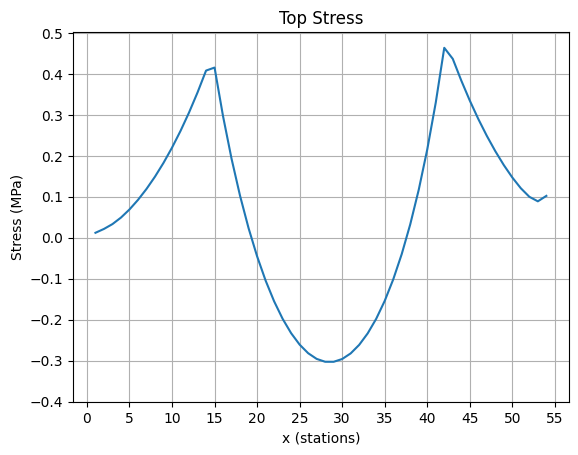

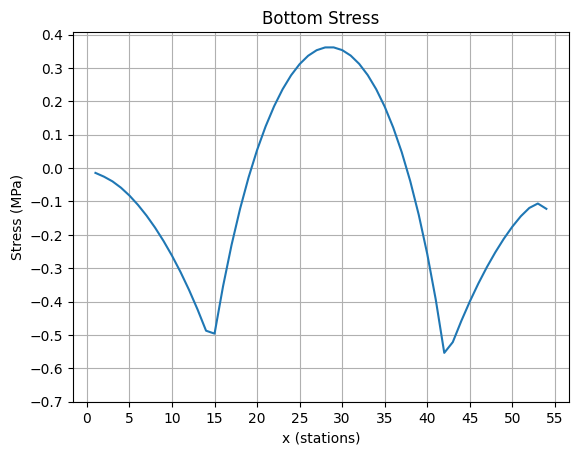

Length_vs_Moment_Display_Stand.csv:
Max Compressive Stress Top: -0.0007161373024840814 MPa
Max Tensile Stress Top: -0.40645170859522584 MPa
Max Compressive Stress Bottom: 0.48554728863890395 MPa
Max Tensile Stress Bottom: 0.0008554977724872513 MPa


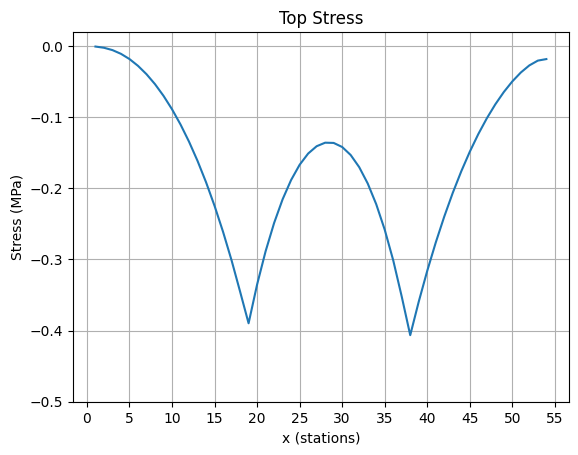

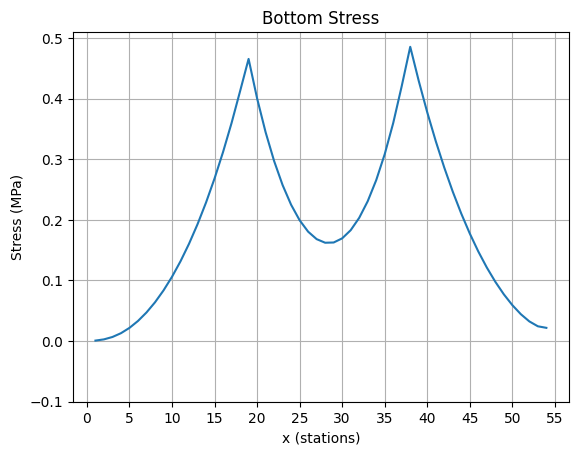

In [7]:
print("Positive Moments for Every Station:\n")
# Loop through each load case
for input_file in moment_files:
    print("\033[4m" + input_file + ":\033[0m")

    # Get the moments for each station from the file
    file_path = os.path.join(script_dir, input_file)
    momentByLength = pd.read_csv(file_path, header=None)
    momentArray = []
    for i in range(len(station_in)):
        momentArray.append(momentByLength[2][i * round(len(momentByLength[0])/len(station_in)) + 1])

    # Initialize arrays to store top and bottom stress for each station
    stressTopArray = []
    stressBottomArray = []

    # Loop through each station
    for k in range(1,station_no-2,1):

        # X-coordinates for the sides of this station
        X1_in = station_in[k]
        X2_in = station_in[k+1]
        X1_out = station_out[k]
        X2_out = station_out[k+1]

        # Arrays to store the YZ-coordinates of each point in the station (inner and outer hull)
        Y1_in = []; Z1_in = []
        Y2_in = []; Z2_in = []
        Y1_out = []; Z1_out = []
        Y2_out = []; Z2_out = []

        # Loop through each x coordinate and get every point in the cross-section
        for i in range(0,len(x_in),1):

            if x_out[i] == X1_out:
                Y1_out.append(y_out[i])
                Z1_out.append(z_out[i])

            elif x_out[i] == X2_out:
                Y2_out.append(y_out[i])
                Z2_out.append(z_out[i])
            
            if x_in[i] == X1_in:
                Y1_in.append(y_in[i])
                Z1_in.append(z_in[i])

            elif x_in[i] == X2_in:
                Y2_in.append(y_in[i])
                Z2_in.append(z_in[i])

        # Depth and Moment (Value) for each station
        depth = (abs(min(Z1_out))+abs(min(Z2_out)))/2
        value = float(momentArray[k])

        # Calculate the canoe's volume (intermediate step for y-bar)
        volume = 0
        product = 0 # y_bar*Volume
        for i in range(0,len(Y1_out)-1,1):
            z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
            x = (abs(X1_in-X2_in) + abs(X1_out-X2_out))/2
            y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
            z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4

            volume_i = x * y * z
            volume += volume_i
            product += volume_i * z_i
        
        # Calculate y-bar from the top and bottom
        y_bar_top = abs(product/volume)
        y_bar_bottom = y_bar_top - depth

        # Calculate I
        I = 0
        for i in range(0,len(Y1_out)-1,1):
            z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
            y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
            z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4
            I_i = (1/12*y*z**3 + y*z*(abs(z_i) - y_bar_top)**2)/(10**(12)) # [m^4]
            I = I + I_i

        # Calculate Stress and Resistance from the top and bottom
        stress_top = value*(y_bar_top/1000)/I
        stress_bottom = value*(y_bar_bottom/1000)/I

        resistance_top = compressive_strength * I / (y_bar_top/1000) * 10**6  # Nm
        resistance_bottom = compressive_strength * I / (y_bar_bottom/1000) * 10**6  # Nm

        # Store this station's top and bottom stresses in arrays
        stressTopArray.append(stress_top/10**6)
        stressBottomArray.append(stress_bottom/10**6)

        # print('Station: ', k)
        # print('Compressive Flexural Stress = ', stress_top/10**6, ' MPa')
        # print('Tensile Flexural Stress = ', stress_bottom/10**6, ' MPa')
        # print("Applied Positive Moment: " + str(value) + ' Nm')
        # print("Resistance Top: " + str(resistance_top) + " Nm")
        # print("Resistance Bottom: " + str(resistance_bottom) + " Nm")
        # print("\n")
        
        # print("Depth: " + str(depth))
        # print("I: " + str(I))
        # print("Ybar Top: " + str(y_bar_top))
        # print("Ybar Bottom: " + str(y_bar_bottom))
        # print(value, y_bar_top, y_bar_bottom, "\n")


    print("Max Compressive Stress Top:", max(stressTopArray), "MPa")
    print("Max Tensile Stress Top:", min(stressTopArray), "MPa")
    print("Max Compressive Stress Bottom:", max(stressBottomArray), "MPa")
    print("Max Tensile Stress Bottom:", min(stressBottomArray), "MPa")

    # Plot top and bottom stress for each load case
    plt.plot(range(1,station_no-2,1), stressTopArray)
    plt.title('Top Stress')
    plt.xticks(np.arange(0, 56, 5))
    plt.xlabel('x (stations)')
    plt.yticks(np.arange(round(min(stressTopArray), 1) - 0.1,round(max(stressTopArray), 1) + 0.1,0.1))
    plt.ylabel('Stress (MPa)')
    plt.grid()
    plt.show()

    plt.plot(range(1,station_no-2,1), stressBottomArray)
    plt.title('Bottom Stress')
    plt.xticks(np.arange(0, 56, 5))
    plt.xlabel('x (stations)')
    plt.yticks(np.arange(round(min(stressBottomArray), 1) - 0.1,round(max(stressBottomArray), 1) + 0.1,0.1))
    plt.ylabel('Stress (MPa)')
    plt.grid()
    plt.show()

# NOTE for the following graphs:
#   Positive = Compressive
#   Negative = Tensile

In [8]:
# Negative moment - This has to be fixed
print("Max Negative Moments:\n")
# Loop through each script
for input_file in input_files:
    print("\033[4m" + input_file + ":\033[0m")
    file_path = os.path.join(script_dir, input_file)
    info = pd.read_csv(file_path, header=None)

    value = float(info[1][4])
    width = float(info[3][4])
    depth = float(info[4][4])
    target_station = float(info[2][4])

    # Extract Station Information
    Y1_in = []; Z1_in = []
    Y2_in = []; Z2_in = []
    Y1_out = []; Z1_out = []
    Y2_out = []; Z2_out = []

    for k in range(1,station_no-2,1):
        if k == target_station:
            X1_in = station_in[k]
            X2_in = station_in[k+1]
            X1_out = station_out[k]
            X2_out = station_out[k+1]
            
            for i in range(0,len(x_out),1):
                if x_out[i] == X1_out:
                    Y1_out.append(y_out[i])
                    Z1_out.append(z_out[i])

                elif x_out[i] == X2_out:
                    Y2_out.append(y_out[i])
                    Z2_out.append(z_out[i])
                
                if x_in[i] == X1_in:
                    Y1_in.append(y_in[i])
                    Z1_in.append(z_in[i])

                elif x_in[i] == X2_in:
                    Y2_in.append(y_in[i])
                    Z2_in.append(z_in[i])

    # Find y_bar
    volume = 0
    product = 0 # y_bar*Volume

    depth = 0

    for i in range(0,len(Y1_out)-1,1):
        z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
        x = (abs(X1_in-X2_in) + abs(X1_out-X2_out))/2
        y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
        z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4

        volume_i = y * z # * x
        volume += volume_i
        product += volume_i * z_i

        depth = max(depth, abs(min(Z1_out)), abs(min(Z2_out)))
        
    y_bar_top = abs(product/volume)
    y_bar_bottom = depth - y_bar_top

    # Find I
    I = 0
    for i in range(0,len(Y1_out)-1,1):
        z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
        y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
        z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4
        I_i = (1/12*y*z**3 + y*z*(abs(z_i) - y_bar_top)**2)/10**(12) # [m^4]
        I = I + I_i

    stress_top = value*(y_bar_top/1000)/I
    stress_bottom = value*(y_bar_bottom/1000)/I

    resistance_top = compressive_strength * I / (y_bar_top/1000) * 10**6  # Nm
    resistance_bottom = compressive_strength * I / (y_bar_bottom/1000) * 10**6  # Nm

    print('Tensile Flexural Stress = ', stress_top/10**6, ' MPa')
    print('Compressive Flexural Stress = ', stress_bottom/10**6, ' MPa')
    print("Applied Negative Moment: " + str(value) + ' Nm')
    print("Stress Top: " + str(stress_top) + " MPa")
    print("Stress Bottom: " + str(stress_bottom) + " MPa")
    print("Resistance Top: " + str(resistance_top) + " Nm")
    print("Resistance Bottom: " + str(resistance_bottom) + " Nm")
    print("\n")


Max Negative Moments:

Shear_and_Moment_6 Paddlers.csv:
Tensile Flexural Stress =  0.0  MPa
Compressive Flexural Stress =  0.0  MPa
Applied Negative Moment: 0.0 Nm
Stress Top: 0.0 MPa
Stress Bottom: 0.0 MPa
Resistance Top: 512.5265212884921 Nm
Resistance Bottom: 346.415449539178 Nm


Shear_and_Moment_4 Paddlers.csv:
Tensile Flexural Stress =  0.0  MPa
Compressive Flexural Stress =  0.0  MPa
Applied Negative Moment: 0.0 Nm
Stress Top: 0.0 MPa
Stress Bottom: 0.0 MPa
Resistance Top: 512.5265212884921 Nm
Resistance Bottom: 346.415449539178 Nm


Shear_and_Moment_2 Paddlers.csv:
Tensile Flexural Stress =  -0.30250366075780777  MPa
Compressive Flexural Stress =  -0.3613709301654879  MPa
Applied Negative Moment: -200.39856295451233 Nm
Stress Top: -302503.6607578078 MPa
Stress Bottom: -361370.93016548787 MPa
Resistance Top: 7287.132284539599 Nm
Resistance Bottom: 6100.059546821183 Nm


Shear_and_Moment_Display_Stand.csv:
Tensile Flexural Stress =  -0.3911983638115597  MPa
Compressive Flexural S